In [1]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [2]:
import pandas as pd
import numpy as np

titanic = pd.read_csv('titanic.csv')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [3]:
targets = titanic.Survived
data = titanic.drop(columns='Survived')

In [4]:
trees = [1] + list(range(10,100,10))
trees

[1, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [5]:
%%time

ada_scoring =[]
for tree in trees:
    ada = AdaBoostClassifier(n_estimators=tree)
    score = cross_val_score(ada, data, targets, scoring='roc_auc', cv=3)
    ada_scoring.append(score)
ada_scoring = np.asmatrix(ada_scoring)

Wall time: 2.98 s


In [9]:
ada_scoring

matrix([[0.77164222, 0.78587863, 0.7430975 ],
        [0.79997124, 0.85557473, 0.86624005],
        [0.80560349, 0.85092513, 0.88447896],
        [0.79925223, 0.84766561, 0.88562937],
        [0.80236794, 0.84502924, 0.87553926],
        [0.80059438, 0.8420094 , 0.87553926],
        [0.80040265, 0.84112262, 0.88050043],
        [0.80136133, 0.84210526, 0.88203432],
        [0.80299108, 0.84385486, 0.87340619],
        [0.8038539 , 0.84450197, 0.87824753]])

In [6]:
%%time

gbc_scoring =[]
for tree in trees:
    gbc = GradientBoostingClassifier(n_estimators=tree)
    score = cross_val_score(gbc, data, targets, scoring='roc_auc', cv=3)
    gbc_scoring.append(score)
gbc_scoring = np.asmatrix(gbc_scoring)

Wall time: 1.63 s


In [14]:
gbc_scoring

matrix([[0.81430352, 0.84991851, 0.87491612],
        [0.81763493, 0.87117726, 0.88677979],
        [0.83247052, 0.87364586, 0.88179465],
        [0.81708369, 0.8781996 , 0.8825616 ],
        [0.81797047, 0.87407727, 0.88196242],
        [0.81451922, 0.87103346, 0.88730707],
        [0.81413575, 0.86930783, 0.88349631],
        [0.80989359, 0.86978717, 0.88126738],
        [0.80982169, 0.8715128 , 0.87635414],
        [0.81356054, 0.87206404, 0.87486818]])

In [7]:
%%time

xgb_scoring =[]
for tree in trees:
    xgb = XGBClassifier(n_estimators=tree)
    score = cross_val_score(xgb, data, targets, scoring='roc_auc', cv=3)
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

Wall time: 1.35 s


In [16]:
gbc_scoring

matrix([[0.81430352, 0.84991851, 0.87491612],
        [0.81763493, 0.87117726, 0.88677979],
        [0.83247052, 0.87364586, 0.88179465],
        [0.81708369, 0.8781996 , 0.8825616 ],
        [0.81797047, 0.87407727, 0.88196242],
        [0.81451922, 0.87103346, 0.88730707],
        [0.81413575, 0.86930783, 0.88349631],
        [0.80989359, 0.86978717, 0.88126738],
        [0.80982169, 0.8715128 , 0.87635414],
        [0.81356054, 0.87206404, 0.87486818]])

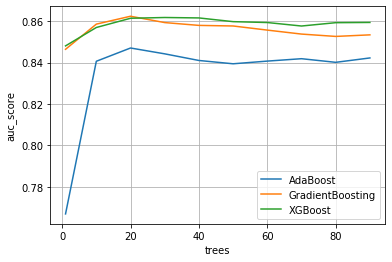

In [9]:
import matplotlib.pyplot as plt

plt.plot(trees, ada_scoring.mean(axis=1), label='AdaBoost')
plt.plot(trees, gbc_scoring.mean(axis=1), label='GradientBoosting')
plt.plot(trees, xgb_scoring.mean(axis=1), label='XGBoost')
plt.grid(True)
plt.xlabel('trees')
plt.ylabel('auc_score')
plt.legend(loc='lower right')
plt.show()